In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/laptop/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
#checking missing values

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df2=df.drop(columns='Unnamed: 0')

In [9]:
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Fetching Ram column value without 'GB'
df2['Ram']=df2['Ram'].str.replace('GB','')
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df2['Weight']=df2['Weight'].str.replace('kg','')
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
# Converting object data type to int32 of Ram and Weight column

df2['Ram']=df2['Ram'].astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


In [13]:
df2['Weight']=df2['Weight'].astype('float64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

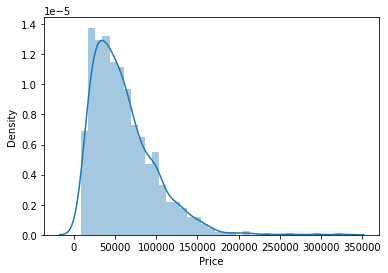

In [14]:
sns.distplot(df2['Price'])

<AxesSubplot:>

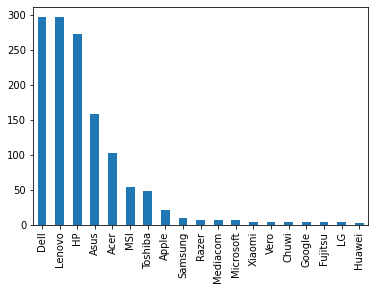

In [15]:
df2['Company'].value_counts().plot(kind='bar')

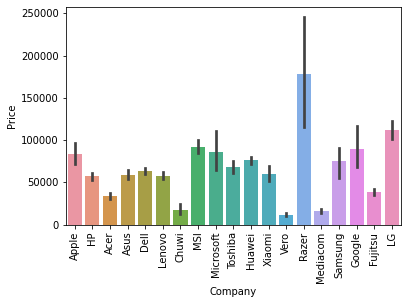

In [16]:
sns.barplot(x=df2['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

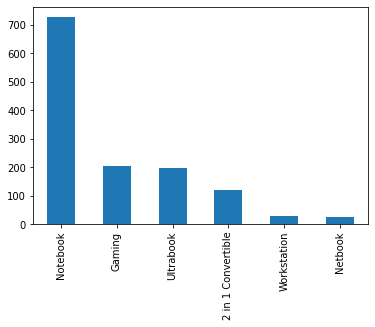

In [17]:
df2['TypeName'].value_counts().plot(kind='bar')

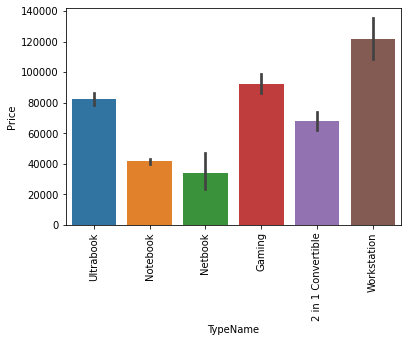

In [18]:
sns.barplot(x=df2['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
#ALL HEADER COLUMNS CONVERT IN LOWERCASE. 
df2.columns=[x.lower() for x in df2.columns]

In [20]:
df2.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Data Cleaning Process
<HTML>
<OL>
<LI>Remove extra unnecessary details form Product Columns</LI>
<LI>Convert Ram into Numeric Values</LI>
<LI>Convert Weight into numeric Values</LI>   
<LI>Extract IPS and Touchscreen Feature form ScreenResolution Column</LI>   
<LI>Extract CPU Vender, CPU Type and CPU Speed in Different Columns</LI>
<LI>Extract Memory type from Memory Column</LI>
<LI>Extract GPU Vender, GPU Type in Different Columns</LI>

 </OL>
</HTML>

In [21]:
df2['screenresolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
# for i in df2['screenresolution']:
#     if 'Touchscreen ' in i:
#         print(1)
#     else:
#         print(0)

In [23]:
df2['touchscreen']=df2['screenresolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df2.tail()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<AxesSubplot:>

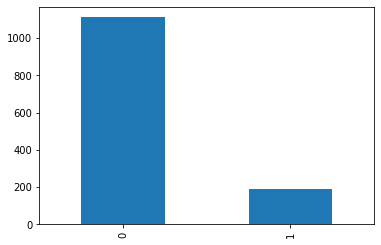

In [25]:
df2['touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='touchscreen', ylabel='price'>

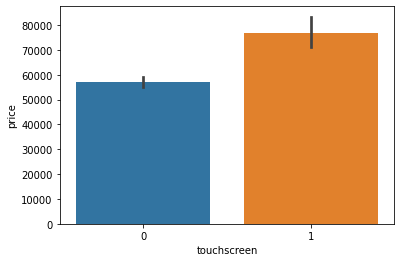

In [26]:
sns.barplot(x=df2['touchscreen'],y=df2['price'])

In [27]:
df2['ips']=df2['screenresolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [28]:
df2.tail()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0


<AxesSubplot:>

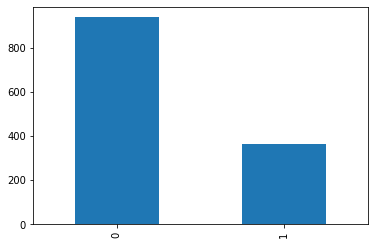

In [29]:
df2['ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ips', ylabel='price'>

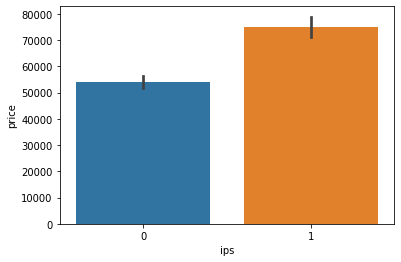

In [30]:
sns.barplot(x=df2['ips'],y=df2['price'])

In [31]:
temp_df=df2['screenresolution'].str.split('x',expand=True)

In [32]:
df2['x_res']=temp_df[0]
df2['y_res']=temp_df[1]

In [33]:
df2.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
df2['x_res']=df2['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df2.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [37]:
df2['x_res']=df2['x_res'].astype('int32')
df2['y_res']=df2['y_res'].astype('int32')

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [39]:
df2.corr()['price']

inches         0.068197
ram            0.743007
weight         0.210370
price          1.000000
touchscreen    0.191226
ips            0.252208
x_res          0.556529
y_res          0.552809
Name: price, dtype: float64

In [40]:
#add a new column called ppi(pixel per inches)

df2['ppi']=((df2['x_res']**2) + (df2['y_res']**2))**0.5 / df2['inches']

In [41]:
df2.head(2)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float64(4), int32(3), int64(2), object(

In [43]:
# drop screenresolution column.

df3=df2.drop(columns=['screenresolution','inches','x_res','y_res'])

In [44]:
df3.head()

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [45]:
df3['cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [46]:
df3['cpu_name']=df3['cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [47]:
df3.head(2)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [48]:
def fetch_processor(text):
    if text=='Intel Core i5' or text=='Intel Core i3'or text=='Intel Core i7':
        return text
    if text.split()[0]=='Intel':
        return 'Other Intel processor'
    else:
        return 'AMD processor'

In [49]:
df3['cpu_brand']=df3['cpu_name'].apply(fetch_processor)

In [50]:
df3.sample(5)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name,cpu_brand
634,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,8,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,21258.72,0,0,100.454670,Intel Celeron Dual,Other Intel processor
577,Lenovo,Gaming,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.64,0,1,127.335675,Intel Core i7,Intel Core i7
1209,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.72,0,0,141.211998,Intel Core i7,Intel Core i7
980,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows 10,2.19,69210.72,1,1,141.211998,Intel Core i7,Intel Core i7
60,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.72,0,0,127.335675,Intel Core i7,Intel Core i7


<AxesSubplot:>

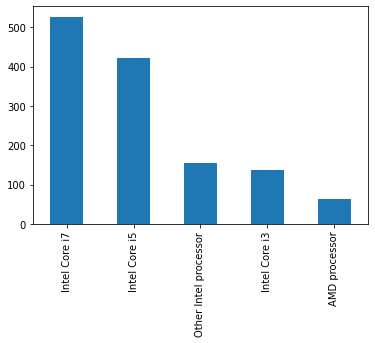

In [51]:
df3['cpu_brand'].value_counts().plot(kind='bar')

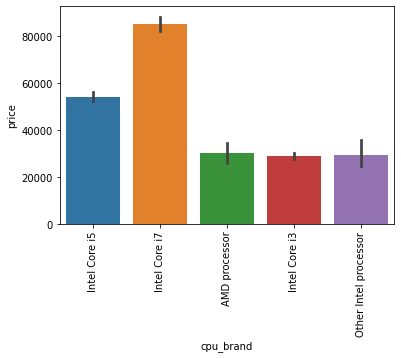

In [52]:
sns.barplot(x=df3['cpu_brand'],y=df3['price'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df4=df3.drop(columns=['cpu','cpu_name'])

In [54]:
df4.head()

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

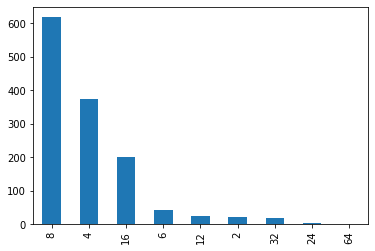

In [55]:
df4['ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ram', ylabel='price'>

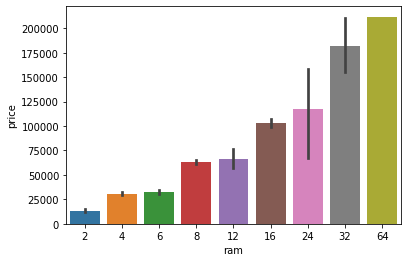

In [56]:
sns.barplot(x=df4['ram'],y=df4['price'])

In [57]:
df4['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

**replace with memory column and create a new dataframe with 0 and 1 column**

In [58]:
df4['memory'] = df4['memory'].astype(str).replace('\.0', '', regex=True)
df4["memory"] = df4["memory"].str.replace('GB', '')
df4["memory"] = df4["memory"].str.replace('TB', '000')
new=df4["memory"].str.split("+", n = 1, expand = True)

**working with first column(0) and removing all the begining and ending space**

In [59]:
df4["first"]= new[0]
df4["first"]=df4["first"].str.strip()

**we create four columns and check if there is exist (HDD,SDD,..)then value is 0 related to columns. like "Layer1HDD is for HDD" **

In [60]:
df4["second"]= new[1]

df4["Layer1HDD"] = df4["first"].apply(lambda x: 1 if "HDD" in x else 0)
df4["Layer1SSD"] = df4["first"].apply(lambda x: 1 if "SSD" in x else 0)
df4["Layer1Hybrid"] = df4["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df4["Layer1Flash_Storage"] = df4["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [61]:
# Replacing columns value with space and get only numeric value like: 128, 1024 etc
df4['first'] =df4['first'].str.replace(r'\D', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [62]:
# fill the nan value with 0.
df4["second"].fillna("0", inplace = True)

In [63]:
# Doing same in df4['second'] column as an as df4['first']

df4["Layer2HDD"] = df4["second"].apply(lambda x: 1 if "HDD" in x else 0)
df4["Layer2SSD"] = df4["second"].apply(lambda x: 1 if "SSD" in x else 0)
df4["Layer2Hybrid"] = df4["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df4["Layer2Flash_Storage"] = df4["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df4['second'] = df4['second'].str.replace(r'\D', '')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [64]:
# Convert these two columns into 'int' data type
df4["first"] = df4["first"].astype(int)
df4["second"] = df4["second"].astype(int)

In [65]:
# Calculating the memory.

df4["HDD"]=(df4["first"]*df4["Layer1HDD"]+df4["second"]*df4["Layer2HDD"])
df4["SSD"]=(df4["first"]*df4["Layer1SSD"]+df4["second"]*df4["Layer2SSD"])
df4["Hybrid"]=(df4["first"]*df4["Layer1Hybrid"]+df4["second"]*df4["Layer2Hybrid"])
df4["Flash_Storage"]=(df4["first"]*df4["Layer1Flash_Storage"]+df4["second"]*df4["Layer2Flash_Storage"])

In [66]:
# Droping all unnecessary columns.
df4.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [67]:
df4.sample(10)

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
986,HP,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.04,42943.68,0,0,141.211998,Intel Core i5,1000,0,0,0
1248,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,2.30,30529.44,0,1,141.211998,Intel Core i5,0,256,0,0
589,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,94305.60,0,1,127.335675,Intel Core i5,1000,128,0,0
663,HP,Notebook,6,1000 HDD,AMD Radeon R5 M430,Windows 10,2.04,28717.92,0,0,141.211998,Intel Core i3,1000,0,0,0
1165,Dell,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,0,0,282.423996,Intel Core i7,1000,128,0,0
730,Acer,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.80,0,1,127.335675,Intel Core i7,1000,128,0,0
298,Lenovo,Notebook,6,1000 HDD,AMD Radeon R5 430,Windows 10,2.40,26586.72,0,0,141.211998,AMD processor,1000,0,0,0
95,Acer,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.50,45128.16,1,1,165.632118,Intel Core i5,0,256,0,0
596,Lenovo,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 620,Windows 10,1.37,107892.00,1,1,165.632118,Intel Core i7,0,512,0,0
554,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.40,0,0,127.335675,Intel Core i7,1000,0,0,0


In [68]:
df5=df4.drop(columns='memory')

In [69]:
df5.head(5)

,company,typename,ram,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [70]:
df5.corr()['price']

ram              0.743007
weight           0.210370
price            1.000000
touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price, dtype: float64

In [71]:
# here we can see that there is no corelation between hybrid, Flash_Storage with target column(price). se we can drop these columns.
df6=df5.drop(columns=['Hybrid','Flash_Storage'])


In [72]:
df6.sample(5)

,company,typename,ram,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD
817,HP,Netbook,4,Intel HD Graphics 400,Chrome OS,1.23,20512.8000,0,0,135.094211,Other Intel processor,0,0
14,Apple,Ultrabook,8,Intel HD Graphics 615,macOS,0.92,67260.6720,0,1,226.415547,Other Intel processor,0,256
1164,HP,Notebook,4,Intel HD Graphics 520,No OS,2.10,25414.0272,0,0,100.454670,Intel Core i5,500,0
599,Dell,Workstation,8,Nvidia Quadro M620,Windows 10,2.06,93932.6400,1,0,141.211998,Intel Core i7,0,256
1154,Dell,Notebook,8,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1,1,282.423996,Intel Core i5,0,256


In [73]:
df6['gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [74]:
df6['gpu_brand']=df6['gpu'].apply(lambda x:x.split()[0])

In [75]:
df6['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [76]:
df7=df6[df6['gpu_brand']!='ARM']

In [77]:
df7['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

<AxesSubplot:xlabel='gpu_brand', ylabel='price'>

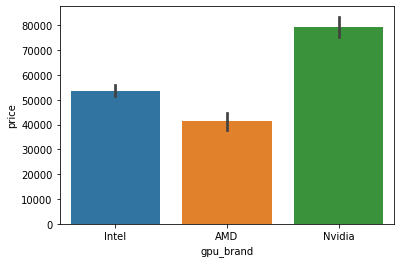

In [78]:
sns.barplot(x=df7['gpu_brand'], y=df7['price'])

In [79]:
df8=df7.drop(columns='gpu')

In [80]:
df8.head(2)

,company,typename,ram,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [81]:
df8['opsys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: opsys, dtype: int64

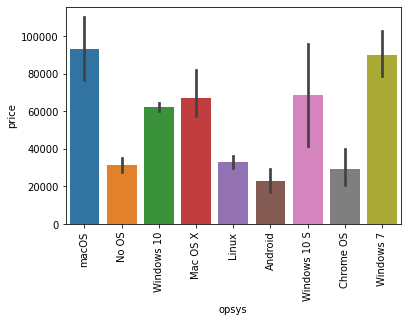

In [82]:
sns.barplot(x=df8['opsys'],y=df8['price'])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
def Os(i):
    if i=='Windows 10' or i=='Windows 10 S' or i=='Windows 7':
        return 'Windows'
    elif i=='Mac OS X' or i=='macOS':
        return 'Mac'
    else:
        return 'Others'
    

In [84]:
df8['os']=df8['opsys'].apply(Os)

In [85]:
df8.sample(5)

,company,typename,ram,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
1046,HP,Notebook,8,Windows 7,1.43,78268.32,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
67,HP,Notebook,4,Windows 10,1.44,12201.12,0,0,111.935204,Other Intel processor,0,32,Intel,Windows
1114,Lenovo,2 in 1 Convertible,4,Android,0.69,29250.72,1,1,224.173809,Other Intel processor,0,0,Intel,Others
955,Dell,Gaming,16,Windows 10,4.36,168045.12,0,1,254.671349,Intel Core i7,1000,512,Nvidia,Windows
267,Lenovo,Notebook,4,No OS,2.20,24881.76,0,0,141.211998,Intel Core i5,1000,0,Intel,Others


In [86]:
#Droping the opsys column.
df9=df8.drop(columns='opsys')

In [87]:
df9.head(2)

,company,typename,ram,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


<AxesSubplot:xlabel='os', ylabel='price'>

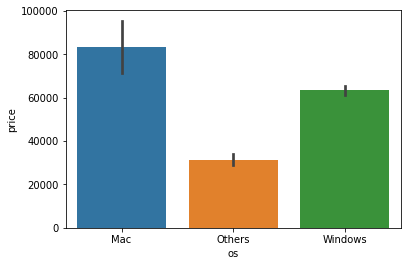

In [88]:
sns.barplot(x=df9['os'],y=df9['price'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

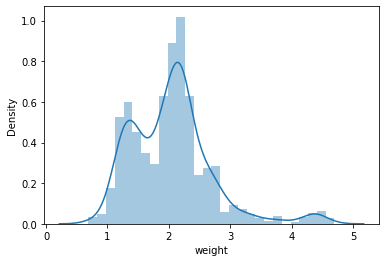

In [89]:
sns.distplot(df9['weight'])

<AxesSubplot:xlabel='weight', ylabel='price'>

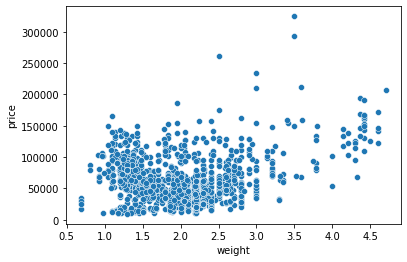

In [90]:
sns.scatterplot(x=df9['weight'],y=df9['price'])

In [91]:
df9.corr()

,ram,weight,price,touchscreen,ips,ppi,HDD,SSD
ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<AxesSubplot:>

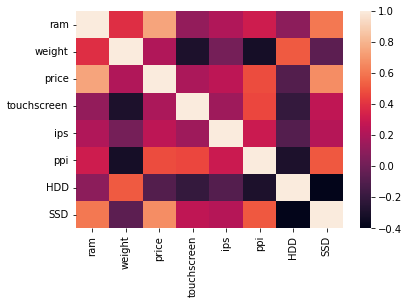

In [92]:
sns.heatmap(df9.corr())

# price

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

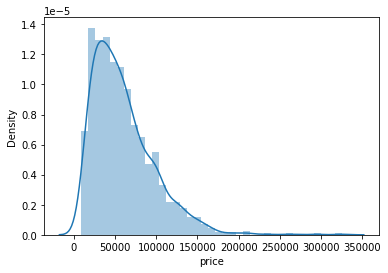

In [93]:
sns.distplot(df9['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

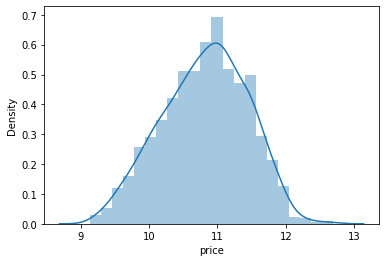

In [94]:
sns.distplot(np.log(df9['price']))

In [95]:
X=df9.drop(columns='price')
y=np.log(df9['price'])

In [96]:
X

,company,typename,ram,weight,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [97]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: price, Length: 1302, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1106, 12)
(196, 12)
(1106,)
(196,)


In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [101]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Linear Regression

In [102]:
step1=ColumnTransformer(transformers=[
    ('clm_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')  #column transformer of categorical columns using OneHotEncoder.

step2=LinearRegression()    #Applying LinearRegression

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])                                    #set the pipeline step.

pipe.fit(X_train,y_train)             #fit the data in pipeline

y_pred=pipe.predict(X_test)
print('R2 Score::',r2_score(y_test,y_pred))
print('MAE::',mean_absolute_error(y_test,y_pred))

R2 Score:: 0.8073277450155137
MAE:: 0.21017827953018942


# Ridge

In [104]:
step1=ColumnTransformer(transformers=[
    ('clm_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=Ridge(alpha=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 Score::',r2_score(y_test,y_pred))
print('MAE::',mean_absolute_error(y_test,y_pred))

R2 Score:: 0.8127331033739459
MAE:: 0.20926802210371429


# Lasso

In [112]:
step1=ColumnTransformer(transformers=[
    ('clm_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=Lasso(alpha=0.001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_Score::',r2_score(y_test,y_pred))
print('MAE::',mean_absolute_error(y_test,y_pred))


R2_Score:: 0.8071853947620582
MAE:: 0.21114361575113452


# KNN

In [122]:
step1=ColumnTransformer(transformers=[
    ('clm_tnf',OneHotEncoder(sparse='False',drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2_Score::',r2_score(y_test,y_pred))
print('MAE::',mean_absolute_error(y_test,y_pred))

R2_Score:: 0.80215040816626
MAE:: 0.19323579887267534


# Decision Tree

In [144]:
step1=ColumnTransformer(transformers=[
    ('clm_tns',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2_Score::",r2_score(y_test,y_pred))
print("MAE::",mean_absolute_error(y_test,y_pred))

R2_Score:: 0.8471725486525763
MAE:: 0.17953638539899872


# SVM

In [146]:
step1=ColumnTransformer(transformers=[
    ('clm_tns',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=SVR(kernel="rbf",C=10000,epsilon=0.1)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2_Score::",r2_score(y_test,y_pred))
print("MAE::",mean_absolute_error(y_test,y_pred))

R2_Score:: 0.80831683884607
MAE:: 0.20239400567757476


# Random Forest

In [153]:
step1=ColumnTransformer(transformers=[
    ('clm_tns',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2_Score::",r2_score(y_test,y_pred))
print("MAE::",mean_absolute_error(y_test,y_pred))

R2_Score:: 0.8873402378382488
MAE:: 0.15860130110457718


# AdaBoost

In [149]:
step1=ColumnTransformer(transformers=[
    ('clm_tns',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2_Score::",r2_score(y_test,y_pred))
print("MAE::",mean_absolute_error(y_test,y_pred))

R2_Score:: 0.7933469750948109
MAE:: 0.22965337668854438


# Exporting the model

In [154]:
import pickle
pickle.dump(df9,open('df.pkl','wb'))
pickle.dump(pipe,open('model.pkl','wb'))

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.0.2.
